<a href="https://colab.research.google.com/github/VladislavasR/PP4/blob/main/PP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start of the PP4

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
!wget https://raw.githubusercontent.com/VladislavasR/PP4/main/electricity_prices.csv

--2022-08-16 17:58:43--  https://raw.githubusercontent.com/VladislavasR/PP4/main/electricity_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4048368 (3.9M) [text/plain]
Saving to: ‘electricity_prices.csv.1’

electricity_prices. 100%[===================>]   3.86M  --.-KB/s    in 0.1s    

2022-08-16 17:58:43 (39.9 MB/s) - ‘electricity_prices.csv.1’ saved [4048368/4048368]



In [16]:
el_prices = pd.read_csv('electricity_prices.csv')
el_prices.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [24]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  object        
 12  ORKTemperature          37719 non-null  object

In [18]:
el_prices = el_prices.replace('?', np.NaN)

In [19]:
el_prices['DateTime']=pd.to_datetime(el_prices['DateTime'], dayfirst=True)

In [25]:
# columns_to_numeric columns changes every time colab is restarted. Need to update which columns change to numeric on every load.
columns_to_numeric = ['SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']
el_prices[columns_to_numeric] = el_prices[columns_to_numeric].apply(pd.to_numeric)

In [26]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [27]:
el_prices.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

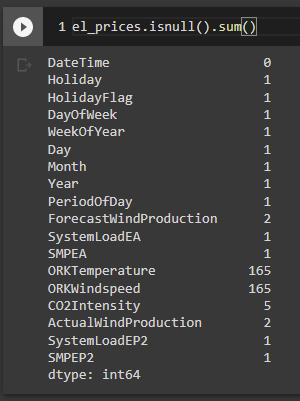

In [28]:
el_prices = el_prices.dropna()

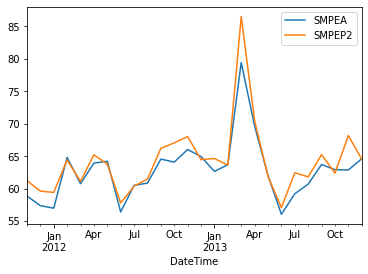

In [29]:
el_prices_plot = el_prices.set_index('DateTime')
el_prices_plot[['SMPEA','SMPEP2']].resample('M').mean().plot()

In [30]:
corr_data=el_prices.corr()[['SMPEP2']].sort_values(by='SMPEP2', ascending=False)

In [31]:
corr_data.head(10)

,SMPEP2
SMPEP2,1.000000
SMPEA,0.618158
SystemLoadEP2,0.517081
SystemLoadEA,0.491096
PeriodOfDay,0.323490
Year,0.045456
HolidayFlag,-0.001838
ORKTemperature,-0.009087
Day,-0.012801
Month,-0.014918


In [32]:
y = el_prices.SMPEP2

In [33]:
X_clean=el_prices[['SMPEA','SystemLoadEP2','SystemLoadEA', 'PeriodOfDay']]
X_train, X_valid, y_train, y_valid = train_test_split(X_clean, y)

In [34]:
clean_model = XGBRegressor(random_state=63)
clean_model.fit(X_train, y_train)

[18:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=63)

In [35]:
clean_predictions = clean_model.predict(X_valid)
mae_XBG = mean_absolute_error(clean_predictions, y_valid)
mean_y = el_prices.SMPEP2.mean()

In [36]:
print('Mean Absolute Error: ' + str(mae_XBG))
print('prediction accuracy: ' + str(1 - mae_XBG/mean_y))

Mean Absolute Error: 13.757049300608115
prediction accuracy: 0.7856534552031225


In [90]:
clean_model_tuned_1 = XGBRegressor(n_estimators=200, learning_rate=0.05)
clean_model_tuned_1.fit(X_train, y_train)
clean_predictions_tuned_1 = clean_model_tuned_1.predict(X_valid)
mae_XBG_tuned_1 = mean_absolute_error(clean_predictions_tuned_1, y_valid)
mean_y = el_prices.SMPEP2.mean()
print('Mean Absolute Error: ' + str(mae_XBG_tuned_1))
print('prediction accuracy: ' + str(1 - mae_XBG_tuned_1/mean_y))

[18:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 13.516729933497077
prediction accuracy: 0.7893978356194773


In [91]:
clean_model_tuned_2 = XGBRegressor(n_estimators=700, learning_rate=0.1)
clean_model_tuned_2.fit(X_train, y_train)
clean_predictions_tuned_2 = clean_model_tuned_2.predict(X_valid)
mae_XBG_tuned_2 = mean_absolute_error(clean_predictions_tuned_2, y_valid)
print('Mean Absolute Error: ' + str(mae_XBG_tuned_2))
print('prediction accuracy: ' + str(1 - mae_XBG_tuned_2/mean_y))

[18:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 12.828857391927542
prediction accuracy: 0.8001154756688996


In [69]:
forest_model = RandomForestRegressor(random_state=63)
forest_model.fit(X_train, y_train)
fores_preds = forest_model.predict(X_valid)
forest_mae = mean_absolute_error(y_valid, fores_preds)
print('Mean Absolute Error: ' + str(forest_mae))
print('prediction accuracy: ' + str(1 - forest_mae/mean_y))

Mean Absolute Error: 12.399606379365247
prediction accuracy: 0.80680357203192


In [93]:
forest_model_2 = RandomForestRegressor(n_estimators=200)
forest_model_2.fit(X_train, y_train)
fores_preds_2 = forest_model_2.predict(X_valid)
forest_mae_2 = mean_absolute_error(y_valid, fores_preds_2)
print('Mean Absolute Error: ' + str(forest_mae_2))
print('prediction accuracy: ' + str(1 - forest_mae_2/mean_y))

Mean Absolute Error: 9.301598890775926
prediction accuracy: 0.8550731672353492


It seems that Random Forest is way more tunable for this data.

In [78]:
full_model = el_prices.drop(['DateTime', 'SMPEP2', 'Holiday'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(full_model, y)

In [79]:
full_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             37682 non-null  int64  
 1   DayOfWeek               37682 non-null  int64  
 2   WeekOfYear              37682 non-null  int64  
 3   Day                     37682 non-null  int64  
 4   Month                   37682 non-null  int64  
 5   Year                    37682 non-null  int64  
 6   PeriodOfDay             37682 non-null  int64  
 7   ForecastWindProduction  37682 non-null  float64
 8   SystemLoadEA            37682 non-null  float64
 9   SMPEA                   37682 non-null  float64
 10  ORKTemperature          37682 non-null  float64
 11  ORKWindspeed            37682 non-null  float64
 12  CO2Intensity            37682 non-null  float64
 13  ActualWindProduction    37682 non-null  float64
 14  SystemLoadEP2           37682 non-null

In [80]:
XGB_model = XGBRegressor(random_state=63)
XGB_model.fit(X_train, y_train)
predictions_XGB_full = XGB_model.predict(X_valid)
mae_XBG_full = mean_absolute_error(predictions_XGB_full, y_valid)
mean_y = el_prices.SMPEP2.mean()
print('Mean Absolute Error: ' + str(mae_XBG_full))
print('prediction accuracy: ' + str((mean_y - mae_XBG_full)/mean_y))

[18:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 13.505793752254238
prediction accuracy: 0.7895682306374389


In [94]:
forest_model_full = RandomForestRegressor(random_state=63, n_estimators=200)
forest_model_full.fit(X_train, y_train)
predictions_fmf = forest_model_full.predict(X_valid)
fmf_mae = mean_absolute_error(y_valid, predictions_fmf)
print('Mean Absolute Error: ' + str(fmf_mae))
print('prediction accuracy: ' + str(1 - fmf_mae/mean_y))

Mean Absolute Error: 9.285970226090647
prediction accuracy: 0.8553166751418688


Random forest with full data performs better thant XGB model. With clean data the difference between models is smaller. It seems that feeding more data points to models will benefit Random forest more. XGB on the other hand improves only a little bit with more data points.

Main takeaway from this task is that finding the correct model for certain data will benefit you more than trying to tune wrong model to your data. But both tasks is time consuming and should be considered in yout assesment if you can use ML in your work.